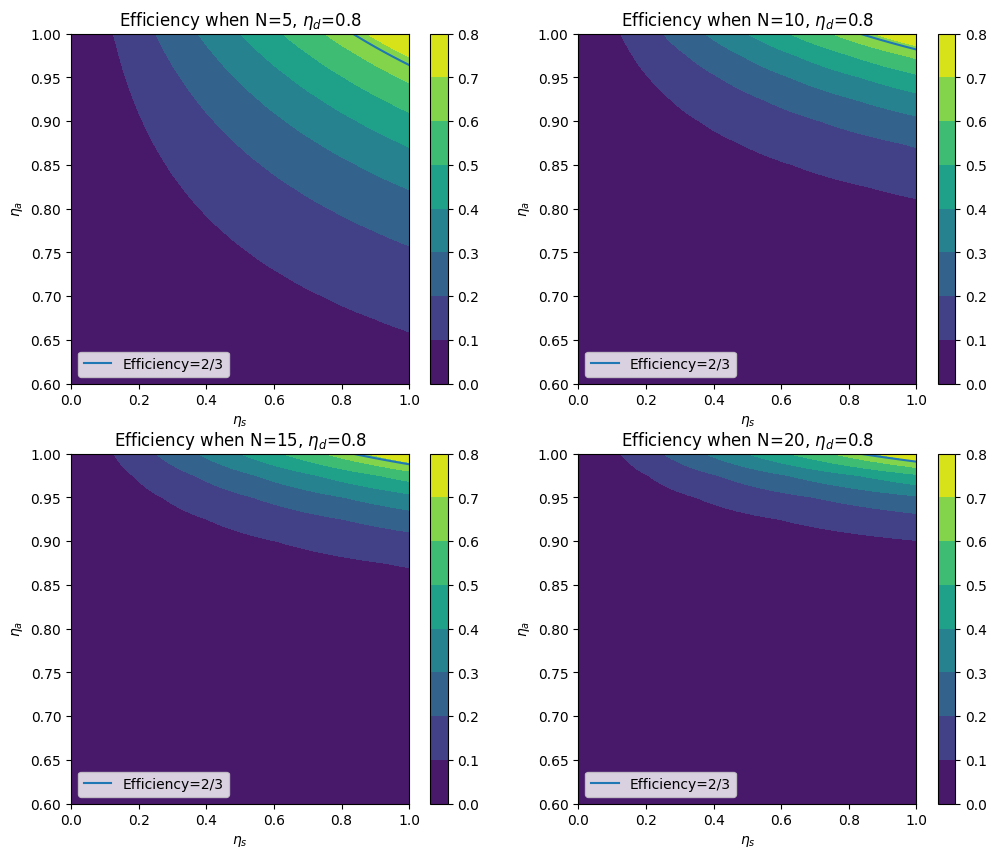

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for N, ax in zip([5, 10, 15, 20], axes.flatten()):
    ax.set_title(f"Efficiency when N={N}, $\\eta_d$=0.8")
    ax.set_xlabel("$\\eta_s$")
    ax.set_ylabel("$\\eta_a$")

    eta_d = 0.8
    delta = 0.025
    drange = np.arange(0, 1 + delta, delta)
    eta_s, eta_a = np.meshgrid(drange, drange)
    eff = eta_s * eta_a**N * eta_d

    cs = ax.contourf(eta_s, eta_a, eff)
    cbar = fig.colorbar(cs)

    ax.set_xlim(0, 1)
    ax.set_ylim(0.6, 1)
    eff = 2 / 3
    eta_s = np.arange(delta, 1 + delta, delta)
    eta_a = (eff / eta_s / eta_d) ** (1 / N)

    ax.plot(eta_s, eta_a, label="Efficiency=2/3")
    ax.legend(loc="lower left")

plt.savefig("eta_s_and_eta_a_contourf.png")

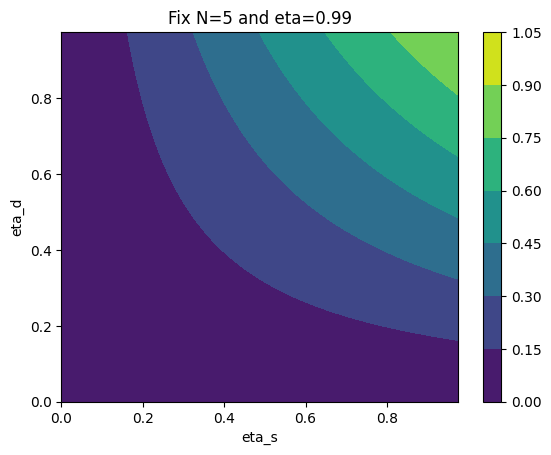

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Fix N=5 and eta=0.99")
ax.set_xlabel("eta_s")
ax.set_ylabel("eta_d")

N = 5
eta = 0.99
delta = 0.025
drange = np.arange(0, 1, delta)
eta_s, eta_d = np.meshgrid(drange, drange)
eff = eta_s * eta**N * eta_d

cs = ax.contourf(eta_s, eta_d, eff)
cbar = fig.colorbar(cs)

plt.savefig("eta_s_and_eta_d_contourf.png")

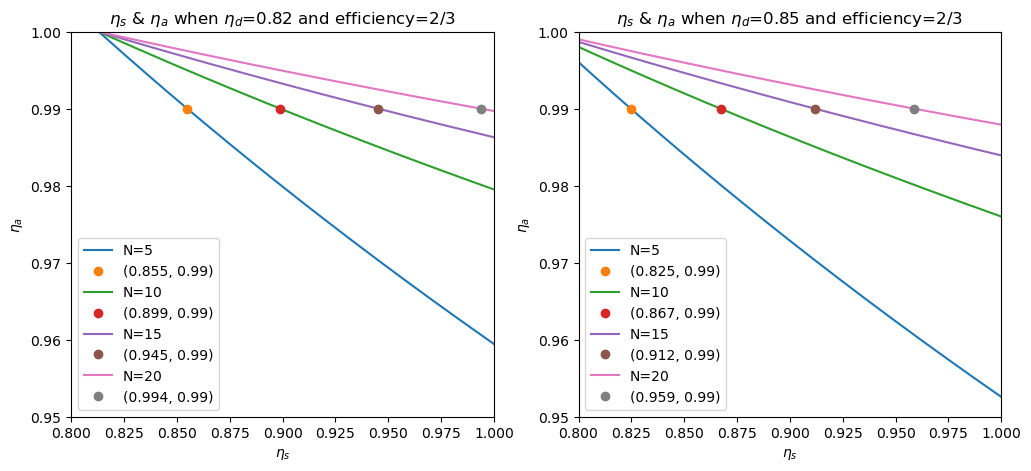

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, eta_d in zip(axes, [0.82, 0.85]):
    ax.set_title(
        f"$\\eta_s$ & $\\eta_a$ when $\\eta_d$={eta_d} and efficiency=2/3"
    )
    ax.set_xlabel("$\\eta_s$")
    ax.set_ylabel("$\\eta_a$")
    ax.set_xlim((0.8, 1))
    ax.set_ylim((0.95, 1))

    eff = 2 / 3
    delta = 0.0025
    eta_s = np.arange(delta, 1 + delta, delta)

    for N in [5, 10, 15, 20]:
        eta_a = (eff / eta_s / eta_d) ** (1 / N)
        ax.plot(eta_s, eta_a, label=f"N={N}")
        ax.plot(
            eff / eta_d / 0.99**N,
            0.99,
            "o",
            label=f"({eff / eta_d / 0.99**N:.3f}, 0.99)",
        )

    ax.legend()

plt.savefig("required_eta_s_and_eta_a.png")

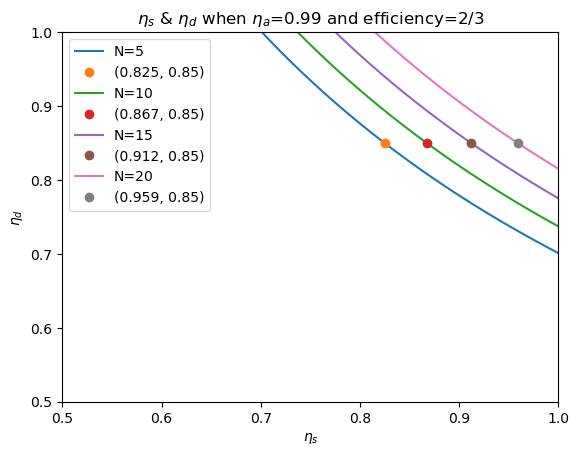

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("$\\eta_s$ & $\\eta_d$ when $\\eta_a$=0.99 and efficiency=2/3")
ax.set_xlabel("$\\eta_s$")
ax.set_ylabel("$\\eta_d$")
ax.set_xlim((0.5, 1))
ax.set_ylim((0.5, 1))

eta_a = 0.99
eff = 2 / 3
delta = 0.0025
eta_s = np.arange(delta, 1 + delta, delta)

for N in [5, 10, 15, 20]:
    eta_d = eff / eta_s / eta_a**N
    ax.plot(eta_s, eta_d, label=f"N={N}")
    ax.plot(
        eff / 0.85 / eta_a**N,
        0.85,
        "o",
        label=f"({eff / 0.85 / eta_a**N:.3f}, 0.85)",
    )

plt.legend()

plt.savefig("required_eta_s_and_eta_d.png")

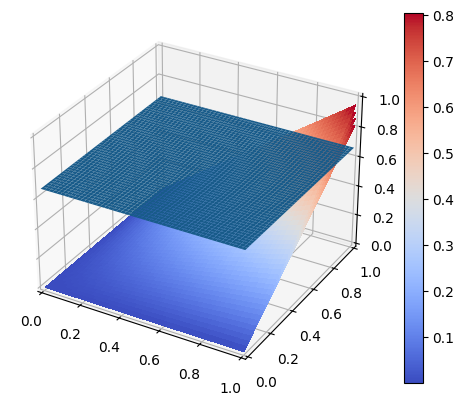

In [91]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

eta_a = 0.99
delta = 0.0025
drange = np.arange(delta, 1 + delta, delta)
eta_s, eta_d = np.meshgrid(drange, drange)
for N in [5, 10, 15, 20]:
    eff = eta_s * eta_a**N * eta_d

    surf = ax.plot_surface(
        eta_s, eta_d, eff, cmap=cm.coolwarm, linewidth=0, antialiased=False
    )

ax.plot_surface(eta_s, eta_d, np.ones(eff.shape) * 2 / 3)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
fig.colorbar(surf)

plt.savefig("naiive3d.png")